In [1]:
# Let's import the data
import pandas as pd
df1 = pd.read_csv('C:/Users/Gebruiker/Desktop/WorkOrderMaster.csv', sep = ',', decimal = ',')
df2 = pd.read_csv('C:/Users/Gebruiker/Desktop/F_OTIF_InFull_W2.csv', sep = ',', decimal = ',')

c:\users\gebruiker\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (53,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#Let's have a look at the main columns
print(df1.count())
print(df2.count())

%WorkOrderMaster                            72117
%WorkOrder                                  72117
%WorkOrderDate                              72117
%WorkOrderStatus                            72117
%ItemNumberShort                            72117
%WorkOrderNumberItemNumberShort             72117
%ItemLocation                               72117
%ItemLot                                    72117
%ItemLocationLot                            72117
%ItemBranch                                 72117
%BusinessUnit                               72117
%Branch                                     72117
%Date                                       72117
%StyleItem                                  72117
%AddressNumber                              72117
Status                                      72117
Work Order Document Type and Description    72117
Work Order Type and Description             72117
Open Completion Date                        72117
OTIF Date                                   72117


In [3]:
#Let's merge the tables
dff = pd.merge(df1,df2, on=['%WorkOrder', '%ItemNumberShort', '%Date', 'Work Order Type'])

In [4]:
#The Requested year looks interesting. Which years do we have?
dff['Requested Year'].value_counts()

2020    7247
2019    7232
2021    2593
2018       9
Name: Requested Year, dtype: int64

In [29]:
dff['Description'].value_counts()

Wax Block Print     9463
Super Wax           4817
SW Paste Fit         955
WBP Paste Fit        551
Classic Revival      393
Wax Print            332
Wax Glitter Glam     126
Grand Super Wax      123
Grand Super-Wax      107
Sky Wax               39
Wax Wax               18
SW paste Fit          17
0731/RW/1             14
WaxWax                12
0395/RW/57            11
SW Paste fit          11
Bubble Wax            10
2961/CA/1              9
2961/CA/15             5
2824/CA/119            5
0731/RW/10             5
0395/RW/93             4
2961/CA/195            4
4191/R/1               3
3353/RW/11             2
Grand Superwax         2
2961/RW/1              2
2323/RW/55             2
2932/RW/3              2
2961/RW/210            2
                    ... 
Grande Superwax        2
3382/RW/33             1
1360/R/91              1
1329/RW/4              1
1360/R/13              1
2047/RW/50             1
4791/RW/28             1
4191/RW/44             1
1391/RW/1              1


In [6]:
#Let's rename some columns
dff.rename(columns={'Performance First Choice': 'Performance_First_Choice', 'Work Order Document Type':'WO_Doc_Type', 'Work Order Type Description':'WO_Type', '%WorkOrderMaster': 'WorkOrderMaster'}, inplace=True)

In [27]:
#We merged the tables, so maybe we won't need to throw out values
dff.WO_Doc_Type.unique()

array(['W2'], dtype=object)

In [8]:
#df4 = dff[dff.WO_Type != 'OMWERKERS']

In [9]:
#df4 = df4[df4.WO_Doc_Type != 'W3']

In [10]:
#df4.WorkOrderMaster = df4.WorkOrderMaster.astype(float)

In [11]:
# Uplift calculation
df4['Uplift'] = (df4['Total First Choice'] + df4['Total Scrap'] + df4['Total Fents']) / df4['Gross Total Quantity Ordered']

In [12]:
# In-full calculation
df4['Infull'] =   df4['Total First Choice'] / df4['Gross Total Quantity Ordered']

In [13]:
df4['Infull']

0        0.928077
1        0.883665
2        0.950451
3        0.897897
4        0.954312
5        0.944679
6        0.926763
7        0.940270
8        0.964367
9        0.615670
10       0.926979
11       0.924262
12       0.847140
13       0.855302
14       0.979726
15       0.852375
16       0.918111
17       0.860880
18       0.850469
19       0.917943
20       0.935825
21       0.863200
22       0.880628
23       0.943245
24       0.988487
25       0.828705
26       0.927330
27       0.971566
28       0.961282
29       0.855799
           ...   
17051    0.862299
17052    0.929050
17053    0.946183
17054    0.813324
17055    0.942483
17056    0.942822
17057    0.943110
17058    0.912182
17059    0.915764
17060    0.911952
17061    0.938926
17062    0.968486
17063    0.939608
17064    0.919112
17065    0.971566
17066    0.777759
17067    0.910719
17068    0.854538
17069    0.887000
17070    0.815811
17071    0.895825
17072    0.945811
17073    0.974473
17074    0.892834
17075    0

In [14]:
#In-full or not?
import numpy as np

conditions = [
    (df4['Infull'] < 0.90),
    (df4['Infull'] >= 0.90) & (df4['Infull'] <= 1.05),
    (df4['Infull'] > 1.05)
    ]

values = ['below', 'yes', 'above']

df4['Infull_cond'] = np.select(conditions, values)

In [15]:
#What portion of all orders was in-full? It's 43%
df4.Infull_cond.value_counts(normalize=True)

below    0.522218
yes      0.430595
0        0.027750
above    0.019437
Name: Infull_cond, dtype: float64

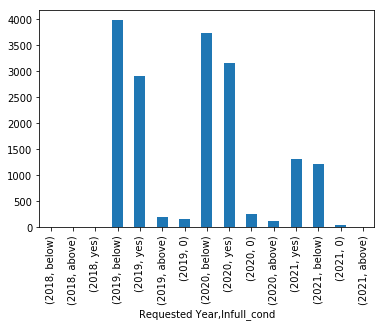

In [28]:
#Exploratory Analysis. There seems to be an improving trend over the years, let's not jinx it.
%matplotlib inline
df4.groupby('Requested Year')['Infull_cond'].value_counts().plot(kind='Bar')

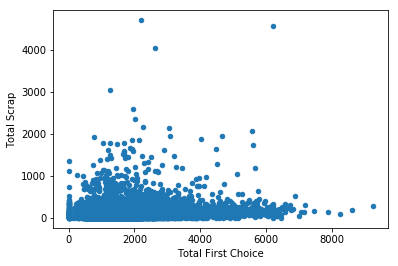

In [17]:
df4.plot(x='Total First Choice', y='Total Scrap', kind='scatter')

Requested Year
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
2021    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Uplift, dtype: object

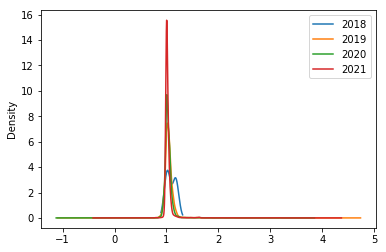

In [18]:
df4.groupby('Requested Year')['Uplift'].plot(kind='kde', legend=True)

In [20]:
# Let's make a training and test set and divide it 80:20, predicting the uplift
df4=df4.fillna(0)
X = df4.drop('Uplift', axis=1)
y = df4['Uplift']
X = X[["Total First Choice","Total Fents","Performance Fents", "Total Scrap Routing", "Total Scrap", 
       "Performance_First_Choice", "Performance Scrap", "Gross Total Quantity Ordered"]]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# This will be put through a linear regression analysis
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
# How much do we deviate from the expected values?
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = lr.predict (X_test)
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_model

0.07136247695081172

In [25]:
result_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [26]:
# 0.07 looks like this:
result_comparison

,Actual,Predicted
10928,0.994896,1.084404
14157,1.092450,1.162598
290,1.000209,1.005137
15684,1.042030,0.986863
6179,1.102827,1.088918
980,1.080758,1.146954
4010,1.043775,1.091867
10798,1.071263,1.022343
8530,1.071054,1.087191
3316,1.069312,1.073663
